In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('Country.csv')
df.columns

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


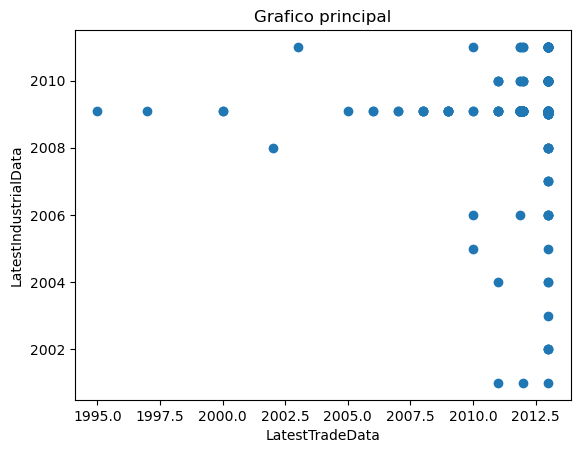

In [13]:
df["LatestTradeData"]=df["LatestTradeData"].fillna(df["LatestTradeData"].mean())
df["LatestIndustrialData"]=df["LatestIndustrialData"].fillna(df["LatestIndustrialData"].mean())
plt.scatter(df["LatestTradeData"],df["LatestIndustrialData"])
plt.title("Grafico principal")
plt.xlabel("LatestTradeData")
plt.ylabel("LatestIndustrialData")
plt.show()

In [14]:
#Selección de variables
X=df[["LatestTradeData","LatestIndustrialData"]]

In [20]:
#Normalizar
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print("\nPrimeras 5 filas: ")
print(X_scaled[:5])


Primeras 5 filas: 
[[ 4.76087487e-01 -1.31873298e-13]
 [ 4.76087487e-01  1.11377631e+00]
 [ 4.76087487e-01  5.33791410e-01]
 [ 0.00000000e+00 -1.31873298e-13]
 [-2.43408110e+00 -1.31873298e-13]]


In [21]:
#Determinar el numero de clusters
inertia=[]
for k in range(1,11):
    Kmeans=KMeans(n_clusters=k,random_state=42)
    Kmeans.fit(X_scaled)
    inertia.append(Kmeans.inertia_)

c:\Users\alanp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\alanp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\alanp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\alanp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

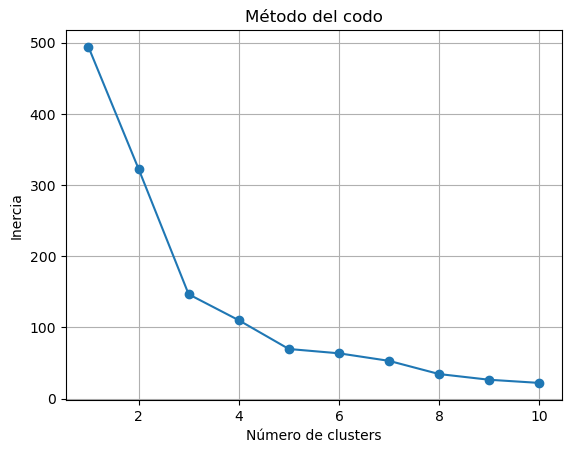

In [22]:
#Graficar
plt.plot(range(1,11),inertia,marker="o")
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.grid()
plt.show()

In [23]:
#Aplicar KMeans: Definir el numero de clusters K=5
k=5
Kmeans=KMeans(n_clusters=k,random_state=42)
clusters=Kmeans.fit_predict(X_scaled)

df["Cluster"]=clusters
print(df.head())

  CountryCode       ShortName       TableName  \
0         AFG     Afghanistan     Afghanistan   
1         ALB         Albania         Albania   
2         DZA         Algeria         Algeria   
3         ASM  American Samoa  American Samoa   
4         ADO         Andorra         Andorra   

                                  LongName Alpha2Code    CurrencyUnit  \
0             Islamic State of Afghanistan         AF  Afghan afghani   
1                      Republic of Albania         AL    Albanian lek   
2  People's Democratic Republic of Algeria         DZ  Algerian dinar   
3                           American Samoa         AS     U.S. dollar   
4                  Principality of Andorra         AD            Euro   

                                        SpecialNotes  \
0  Fiscal year end: March 20; reporting period fo...   
1                                                NaN   
2                                                NaN   
3                                         

c:\Users\alanp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


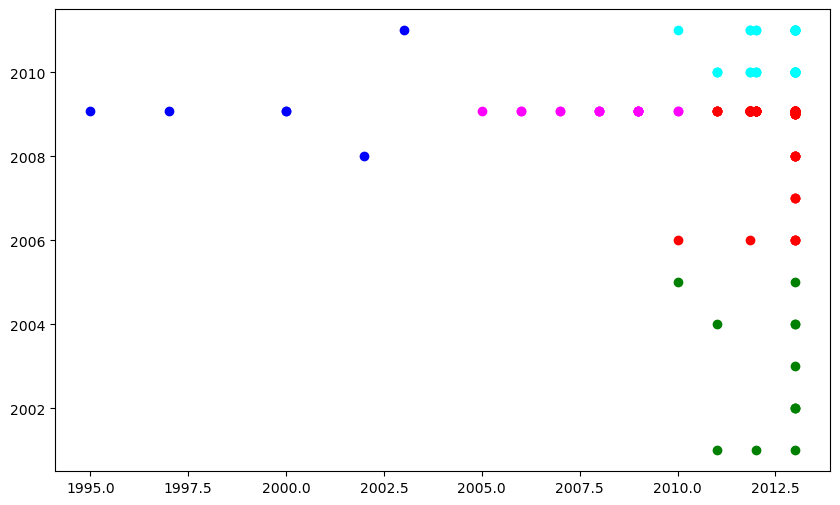

In [28]:
#Visual los clusters
colors=["red","blue","green","cyan","magenta"]
#Graficar los clusters
plt.figure(figsize=(10,6))
for i in range(5):
    plt.scatter(df[df["Cluster"]==i]["LatestTradeData"],df[df["Cluster"]==i]["LatestIndustrialData"],c=colors[i],
    label=f'Cluster {i}')

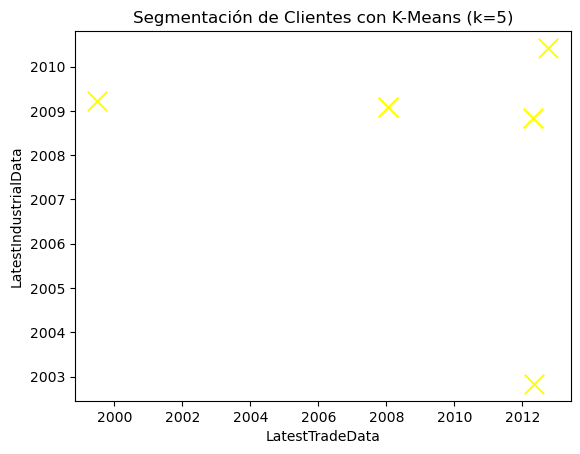

In [29]:
#Centroides
centers = scaler.inverse_transform(Kmeans.cluster_centers_)#Invertir
plt.scatter(centers[:,0],centers[:,1],c="yellow",s=200,marker="x",label="Centroides")
plt.xlabel("LatestTradeData")
plt.ylabel("LatestIndustrialData")
plt.title("Segmentación de Clientes con K-Means (k=5)")
plt.show()